RAIN - Real & Artificial Intelligence for Neuroscience

## Geometric analysis
- This notebook will take the position.csv files (created using `2a-Prepare_positions` notebook) and process them using geometric criteria (distance, angle and overall movement).

#### Requirements:
- The position.csv files.
- Geometric thresholds for exploration and freezing (see below).

---
#### Load the necessary modules

In [1]:
import os
import rainstorm.geometric_analysis as rst

---
#### 1. State your project path
You need to define the path to the same folder used in `2-Prepare_positions`, and the path to the parameters file (which contains the thresholds for the geometric analysis).

In [ ]:
base = r'C:\Users\dhers\Desktop\RAINSTORM'
folder_path = os.path.join(base, r'docs\examples\NOR_example')
params = os.path.join(folder_path, 'params.yaml')

---
#### 2. We can open an example file and see what is inside

In [6]:
example_path = rst.choose_example_csv(params, look_for = 'TR1')

# Plot mouse exploration around multiple targets
rst.plot_position(params, example_path)

Plotting coordinates from social_R14_TR1_position.csv


The plot shows the position of each target, along with the nose tracked and colored according to the angle of approach towards them.

The geometric method labels exploration events when the nose is both colored (heading towards the target) and inside the dashed line (close to the target).

---
#### 3. We can use the positions to measure time spent in each of the drawn ROIs.

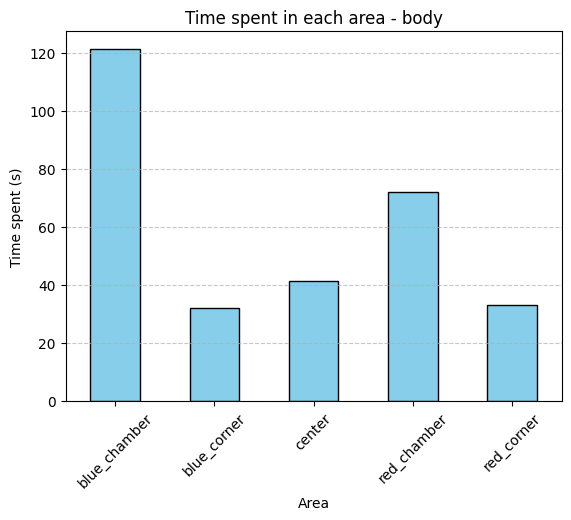

In [7]:
roi_activity = rst.detect_roi_activity(params, example_path, plot_activity=True)

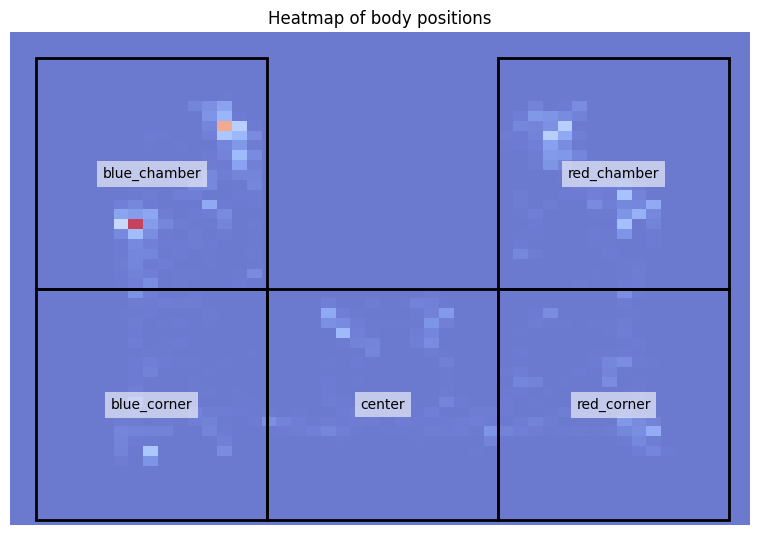

In [8]:
rst.plot_heatmap(params, example_path)

---
#### 4.  We can also measure other behaviours, such as freezing

In [9]:
# Plot freezing events
rst.plot_freezing(params, example_path)

The plot shows the movement of the mouse over time, shading over freezing events.

By setting a freezing threshold (which we can modify in the params file), we can quantify the time the mouse spent freezing.

---
#### 5. Finally, we can analyze the position files and create:
- A movement.csv file containing distance traveled, roi activity, and freezing events.
- A geolabels.csv file with the exploration of each object, frame by frame.

In [8]:
# Analyze all files in the folder
rst.create_movement_and_geolabels(params)

Saved movement to 2025_03-Y_Maze-R01_C1i_movement.csv
Saved movement to 2025_03-Y_Maze-R02_C1d_movement.csv
Saved movement to 2025_03-Y_Maze-R03_C1a_movement.csv
Saved movement to 2025_03-Y_Maze-R04_C2i_movement.csv
Saved movement to 2025_03-Y_Maze-R05_C2d_movement.csv
Saved movement to 2025_03-Y_Maze-R06_C2a_movement.csv
Saved movement to 2025_03-Y_Maze-R07_C3i_movement.csv
Saved movement to 2025_03-Y_Maze-R08_C3d_movement.csv
Saved movement to 2025_03-Y_Maze-R09_C3n_movement.csv
Saved movement to 2025_03-Y_Maze-R10_C4i_movement.csv
Saved movement to 2025_03-Y_Maze-R11_C4d_movement.csv
Saved movement to 2025_03-Y_Maze-R12_C5i_movement.csv
Saved movement to 2025_03-Y_Maze-R14_C5a_movement.csv
Saved movement to 2025_03-Y_Maze-R16_C6i_movement.csv
Saved movement to 2025_03-Y_Maze-R17_C6d_movement.csv
Saved movement to 2025_03-Y_Maze-R18_C6a_movement.csv


---
---
#### Two new csv files were created for each video, one for exploration geolabels and the other for movement related scores.
We can:
- Move on to the next notebook to create an artificial neural network that labels exploratory behavior, ` 4-Create_models`.
- Loose all patience, go straight to ` 6-Seize_labels` and use the geolabels to plot the results of the experiment.

---
RAINSTORM - Created on Oct 26, 2023 - @author: Santiago D'hers